# Diffusivity Package

In the following code cells, the newly developed diffusivity package will be tested.

In [1]:
from PyQt5.QtWidgets import QFileDialog
import json as js
import numpy as np
import pandas as pd
from pathlib import Path, PureWindowsPath
from scipy import io
from scipy.ndimage import gaussian_filter
from scipy.optimize import curve_fit
from scipy.stats import norm
from scipy.special import erf
from scipy.constants import elementary_charge, Boltzmann
from math import pi
import matplotlib as mpl
from scipy.stats import linregress
import matplotlib.pyplot as plt
import matplotlib.patches as pat
import matplotlib.cm as cm
import matplotlib.mlab as mlab
from matplotlib import gridspec
from matplotlib.backends.backend_pdf import PdfPages

import os
from bisect import bisect_left, bisect_right
import re
import itertools


from diffusivity import DiffusivityMeasurement

### Testing the difusivity package

importing a mat file

In [2]:
T2=DiffusivityMeasurement('./testing_meas/200303_200221A_diffusweep.mat')

importing a json file

In [8]:
T2=DiffusivityMeasurement('./testing_meas/200715_200218A_diffusweep-002.json')

defining the fit function type

In [3]:
T2.RTfit.fit_function_type = 'richards'
#T2.RTfit.fit_function_type = 'gauss_cdf'

Determination of diffusivity and 

In [4]:
T2.calc_RT_fits()
#print(T2.calc_diffusivity(fit_low_lim=7, fit_upp_lim=8))
T2.calc_diffusivity()
d_values=T2.get_Dfit_properties()
D, dBc2dT, B_0, err_D, err_dBc2dT, r_squared = d_values
print(d_values)
print('D: ', D)
print('dBc2dT: ', dBc2dT)
print('B_0: ', B_0)
print('err_D: ', err_D)
print('err_dBc2dT: ', err_dBc2dT)
print('r_squared: ', r_squared)
print('\n')
print('Diffusivity', T2.diffusivity)
print('Err diffusivity', T2.diffusivity_err)
print('Film Tc: ', T2.Tc_0T)


C:\Users\Noah.Ploch\Documents_C\Python-diffusivity-module\diffusivity-module\diffusivity.py:494: RuntimeWarning: overflow encountered in float_power
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)
C:\Users\Noah.Ploch\Documents_C\Python-diffusivity-module\diffusivity-module\diffusivity.py:494: RuntimeWarning: divide by zero encountered in true_divide
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)
C:\Users\Noah.Ploch\Documents_C\Python-diffusivity-module\diffusivity-module\diffusivity.py:494: RuntimeWarning: overflow encountered in true_divide
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)


(0.6493159082644531, -1.6897675445611073, 16.106775724099506, 1.26581106564697e-07, 0.0032941229824380307, 0.9984518502086159)
D:  0.6493159082644531
dBc2dT:  -1.6897675445611073
B_0:  16.106775724099506
err_D:  1.26581106564697e-07
err_dBc2dT:  0.0032941229824380307
r_squared:  0.9984518502086159


Diffusivity 0.6493159082644531
Err diffusivity 1.26581106564697e-07
Film Tc:  9.5319476196254


get Bc2vsT

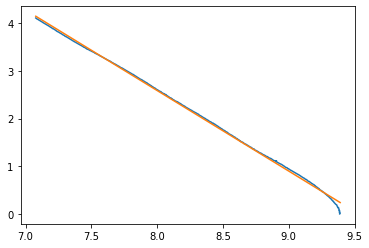

In [5]:
%matplotlib inline
T, Bc2 = T2.Bc2_vs_T()
plt.plot(T, Bc2)
T_fit, Bc2_fit = T2.get_Bc2vsT_fit()
plt.plot(T_fit, Bc2_fit)
# print(T2.Bc2_vs_T())
# print(T_fit, Bc2_fit)
#print(T2.Bc2_vs_T(err=True))

get RvsT

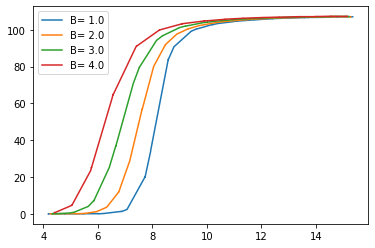

In [20]:
%matplotlib inline
# using default B
# T, R = T2.R_vs_T()
# for t, r in zip(T.values(), R.values()):
#     plt.plot(t,r)

# B as scalar
# plt.plot(*T2.R_vs_T(B=0.1))

# B as list
B=[1,2,3,4]
T, R = T2.R_vs_T(B)
for key, t, r in zip(T.keys(), T.values(), R.values()):
    plt.plot(t,r, label='B= '+ str(key))
plt.legend()

# Returning errors as well
# T, R, T_err, R_err = T2.R_vs_T(B=1, err=True)
# fig = plt.figure()
# ax=fig.add_subplot(111)
# ax.errorbar(T, R, yerr=R_err, xerr=T_err)

# print(T,R)
# print(T,R,T_err, R_err)

get R vs B

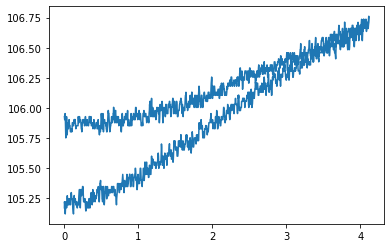

In [21]:
# print(T2.R_vs_B(9))
#print(T2.R_vs_B(9, err=True))
plt.plot(*T2.R_vs_B(10))

get Parameters

In [6]:
# take into account that you get back all the fitted b fields, not only the ones you asked for, since the function only adds parameters to the 
#print(T2.fit_function_parameters())
#print(T2.parameters_RTfit)
T2.RTfit.set_fit_parameters(b=5)
print(T2.fit_function_parameters(B=0.1))
#print(T2.fit_function_parameters(B='all'))

# T2.parameters_RTfit={}
# # shows dict_param is updated continuously
# T2.fit_function_parameters(B=[1,2,3,4])
# print(T2.parameters_RTfit)
# T2.fit_function_parameters(B=[2.5,3.5])
# print(T2.parameters_RTfit)
# print(T2.fit_function_parameters(B=2.3))
# print(T2.parameters_RTfit)

# T2.parameters_RTfit={}
# print(T2.fit_function_parameters(B=[2.3,2.7]))
# print(T2.parameters_RTfit)

I am setting the parameters!
{'b': 0.0, 'm': 53.54439959636731, 'nu': 1, 'k': 107.08879919273463}
{}
{'b': 5.0, 'm': 53.54439959636731, 'nu': 1.0, 'k': 107.08879919273463}


show changing fit area for RvsT fits works

In [37]:
T2.parameters_RTfit={}
B=0.5
T2.fit_function_parameters(B)
print(T2.parameters_RTfit)
T2.set_RT_fit_limits(6,9)
T2.fit_function_parameters(B)
print(T2.parameters_RTfit)
T2.fit_function_parameters(B)
print(T2.parameters_RTfit)
T2.set_RT_fit_limits(7,8)
T2.fit_function_parameters(B)
print(T2.parameters_RTfit)

# check why always the same values

{0.5: {'b': 2.392937189191836, 'm': 0.8704625355858958, 'nu': 2.307998918962201e-08, 'k': 105.68050087266754}}
{0.5: {'b': 2.392937189191836, 'm': 0.8704625355858958, 'nu': 2.307998918962201e-08, 'k': 105.68050087266754}}
{0.5: {'b': 2.392937189191836, 'm': 0.8704625355858958, 'nu': 2.307998918962201e-08, 'k': 105.68050087266754}}
{0.5: {'b': 2.392937189191836, 'm': 0.8704625355858958, 'nu': 2.307998918962201e-08, 'k': 105.68050087266754}}


get Tc

In [38]:
print(T2.get_Tc())
print(T2.get_Tc(B=1.1))
print(T2.get_Tc(err=True))
print(T2.get_Tc(B=1, err=True))

[8.52906091 8.48883948 8.40846229 8.33593202 8.23907338 8.14493722]
8.096831611775196
(array([8.52906091, 8.48883948, 8.40846229, 8.33593202, 8.23907338,
       8.14493722]), array([0.4553593 , 0.41513787, 0.33476068, 0.26223042, 0.16537177,
       0.07123561]), array([0.17432429, 0.21454572, 0.29492291, 0.36745317, 0.46431182,
       0.55844798]))
(8.144937217843507, 0.07123561232127852, 0.5584479754298535)


fitting R vs T sweeps

C:\Users\Noah.Ploch\Documents_C\Python-diffusivity-module\diffusivity-module\diffusivity.py:494: RuntimeWarning: overflow encountered in float_power
  return a + (k-a)/np.float_power((c+q*np.exp(-b*(t-m))),1/nu)


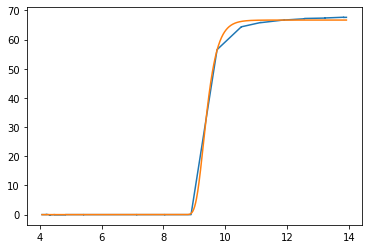

In [6]:
%matplotlib inline
# B=1
# T, R = T2.R_vs_T()
# T_fit, R_fit = T2.fit_function()
# for t,r,tf,rf in zip(T.values(), R.values(), T_fit.values(), R_fit.values()):
#     plt.plot(t,r,'x')
#     plt.plot(tf, rf)
# plt.xlim(7,9.5)
#print(T_fit, R_fit)

plt.plot(*T2.R_vs_T(B=0), *T2.fit_function(B=0))

Testing the fit area limits

In [46]:
T2.fit_function_parameters(B='all')
T2.calc_diffusivity()
d_values=T2.get_Dfit_properties()
print(d_values)

T2.fit_function_parameters(B='all')
T2.calc_diffusivity()
d_values=T2.get_Dfit_properties()
print(d_values)

# reducing fit area RvsT
T2.set_RT_fit_limits(6,9)
T2.fit_function_parameters(B='all')
T2.calc_diffusivity()
d_values=T2.get_Dfit_properties()
print(d_values)

T2.set_RT_fit_limits(0,np.inf)
T2.fit_function_parameters(B='all')
T2.calc_diffusivity()
d_values=T2.get_Dfit_properties()
print(d_values)

T2.set_RT_fit_limits(0,np.inf)
T2.fit_function_parameters(B='all')
T2.calc_diffusivity()
d_values=T2.get_Dfit_properties()
print(d_values)

#changing fit area Bc2vsT
T2.calc_diffusivity(fit_low_lim=7, fit_upp_lim=8)
d_values=T2.get_Dfit_properties()
print(d_values)

(0.6318081011472605, -1.7365920854135404, 15.083871310545124, 1.915667468574908e-07, 0.0052654167589345135, 0.9962631634356204)
(0.6320200970877418, -1.7360095873662855, 15.079990965457917, 1.9288851784274937e-07, 0.005298190956440401, 0.9962141461627022)
(0.6318345880475809, -1.7365192863893437, 15.083386819689945, 1.9168775251304882e-07, 0.005268300999983711, 0.9962587712848283)
(0.631844704118941, -1.736491484062435, 15.083194344798237, 1.9168108943635406e-07, 0.005267949185807867, 0.9962591497375546)
(0.6317062196730558, -1.7368721626966888, 15.085693877548053, 1.9064103045450673e-07, 0.005241662794385933, 0.9962978687446974)
(0.655323985335244, -1.674275583536286, 14.666428922197973, 6.319566814891942e-08, 0.001614574874943268, 0.9998465807687579)


In [31]:
import json
with open('./testing_meas/200715_200218A_diffusweep-002.json') as json_file:
    data = json.load(json_file)
    [print(i.keys()) for i in data['sweep']]

dict_keys(['t', 'T_PCB', 'T_sample', 'T_PCB_ohms', 'T_sample_ohms', 'B', 'R'])
dict_keys(['t', 'T_PCB', 'T_sample', 'T_PCB_ohms', 'T_sample_ohms', 'B', 'R'])
dict_keys(['t', 'T_PCB', 'T_sample', 'T_PCB_ohms', 'T_sample_ohms', 'B', 'R'])
dict_keys(['t', 'T_PCB', 'T_sample', 'T_PCB_ohms', 'T_sample_ohms', 'B', 'R'])
dict_keys(['t', 'T_PCB', 'T_sample', 'T_PCB_ohms', 'T_sample_ohms', 'B', 'R'])
dict_keys(['t', 'T_PCB', 'T_sample', 'T_PCB_ohms', 'T_sample_ohms', 'B', 'R'])
dict_keys(['t', 'T_PCB', 'T_sample', 'T_PCB_ohms', 'T_sample_ohms', 'B', 'R'])
dict_keys(['t', 'T_PCB', 'T_sample', 'T_PCB_ohms', 'T_sample_ohms', 'B', 'R'])
dict_keys(['t', 'T_PCB', 'T_sample', 'T_PCB_ohms', 'T_sample_ohms', 'B', 'R'])
dict_keys(['t', 'T_PCB', 'T_sample', 'T_PCB_ohms', 'T_sample_ohms', 'B', 'R'])
dict_keys(['t', 'T_PCB', 'T_sample', 'T_PCB_ohms', 'T_sample_ohms', 'B', 'R'])
dict_keys(['t', 'T_PCB', 'T_sample', 'T_PCB_ohms', 'T_sample_ohms', 'B', 'R'])
dict_keys(['t', 'T_PCB', 'T_sample', 'T_PCB_ohms', '